In [1]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customers-1000.csv')
print(df.head(5))

   Index      Customer Id First Name Last Name                      Company  \
0      1  dE014d010c7ab0c     Andrew   Goodman                Stewart-Flynn   
1      2  2B54172c8b65eC3      Alvin      Lane  Terry, Proctor and Lawrence   
2      3  d794Dd48988d2ac      Jenna   Harding                 Bailey Group   
3      4  3b3Aa4aCc68f3Be   Fernando      Ford                 Moss-Maxwell   
4      5  D60df62ad2ae41E       Kara     Woods              Mccarthy-Kelley   

               City           Country                Phone 1  \
0       Rowlandberg             Macao      846-790-4623x4715   
1          Bethside  Papua New Guinea     124-597-8652x05682   
2      Moniquemouth             China     (335)987-3085x3780   
3        Leeborough             Macao          (047)752-3122   
4  Port Jacksonland             Nepal  +1-360-693-4419x19272   

               Phone 2                          Email Subscription Date  \
0  (422)787-2331x71127  marieyates@gomez-spencer.info        2021

In [3]:
print("\n=== Data Quality Summary ===")
print(f"Total Null Values: {df.isnull().sum().sum()}")


=== Data Quality Summary ===
Total Null Values: 0


In [4]:
df.drop_duplicates(inplace=True)
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'])

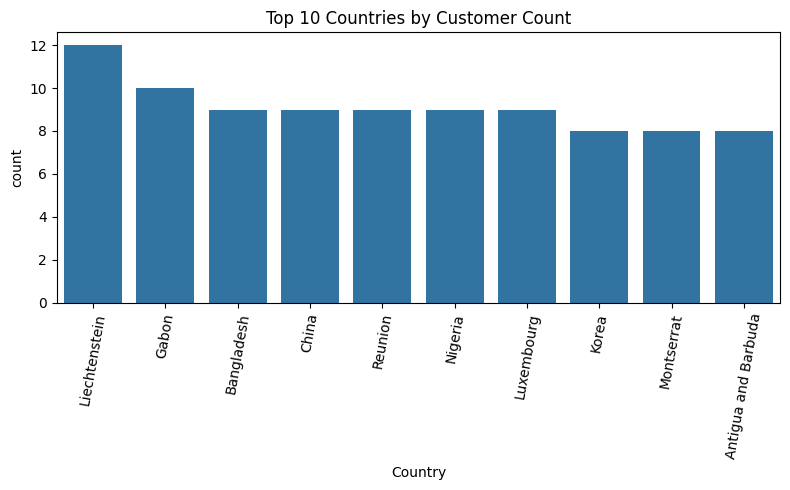

In [5]:
plt.figure(figsize=(8,5))
# Get top 10 countries
top_countries = df['Country'].value_counts().head(10).index
# Plot only top 10
sns.countplot(data=df, x='Country', order=top_countries)
plt.xticks(rotation=80)
plt.title("Top 10 Countries by Customer Count")
plt.tight_layout()
plt.show()

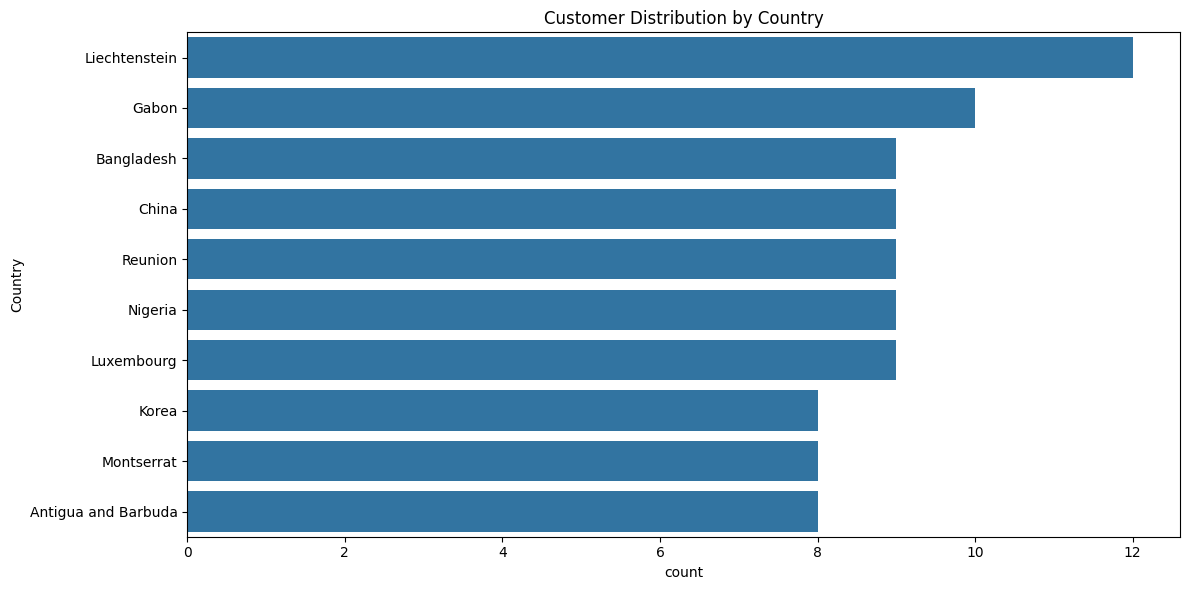

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Country', order=df['Country'].value_counts().head(10).index)
plt.title('Customer Distribution by Country')
plt.tight_layout()
plt.show()


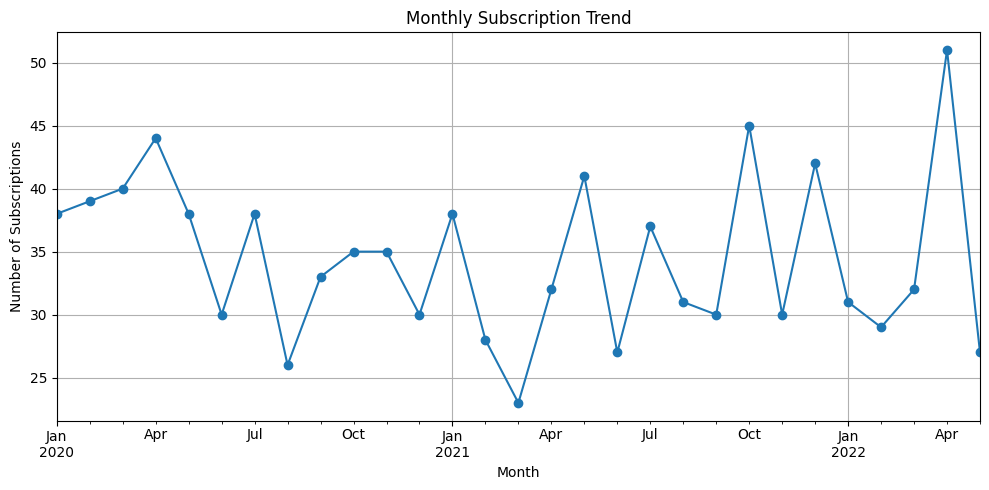

In [7]:
subscriptions_by_month = df['Subscription Date'].dt.to_period('M').value_counts().sort_index()
subscriptions_by_month.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Subscription Trend')
plt.ylabel('Number of Subscriptions')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

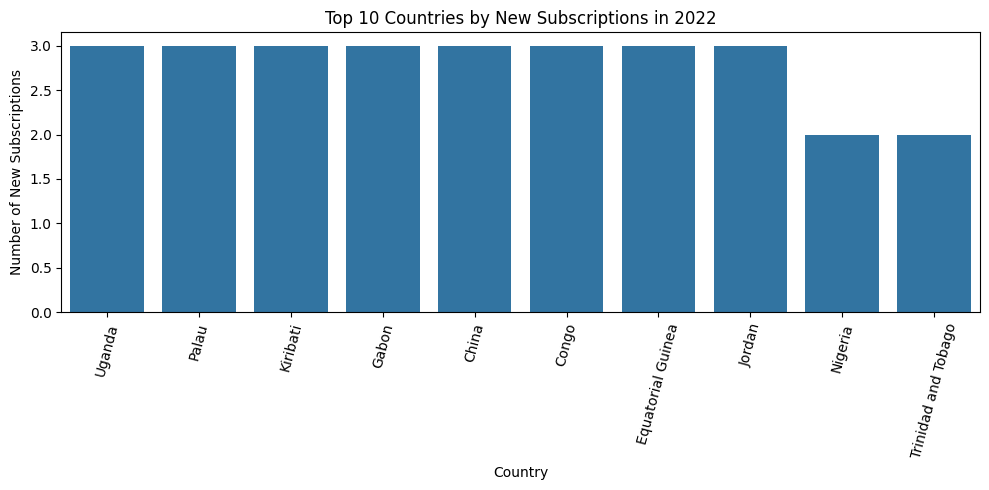

In [8]:
latest_year = df['Subscription Date'].dt.year.max()
recent_year_df = df[df['Subscription Date'].dt.year == latest_year]
country_counts = recent_year_df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title(f"Top 10 Countries by New Subscriptions in {latest_year}")
plt.ylabel("Number of New Subscriptions")
plt.xlabel("Country")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

*Performing Basic Unsupervised Machine Learning*

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

top_10_countries = df['Country'].value_counts().nlargest(10).index
df_top10 = df[df['Country'].isin(top_10_countries)].copy()

#  Encode country names into numbers
le = LabelEncoder()
df_top10['Country_Encoded'] = le.fit_transform(df_top10['Country'])

#  Apply KMeans clustering
X = df_top10[['Country_Encoded']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_top10['Cluster'] = kmeans.fit_predict(X)



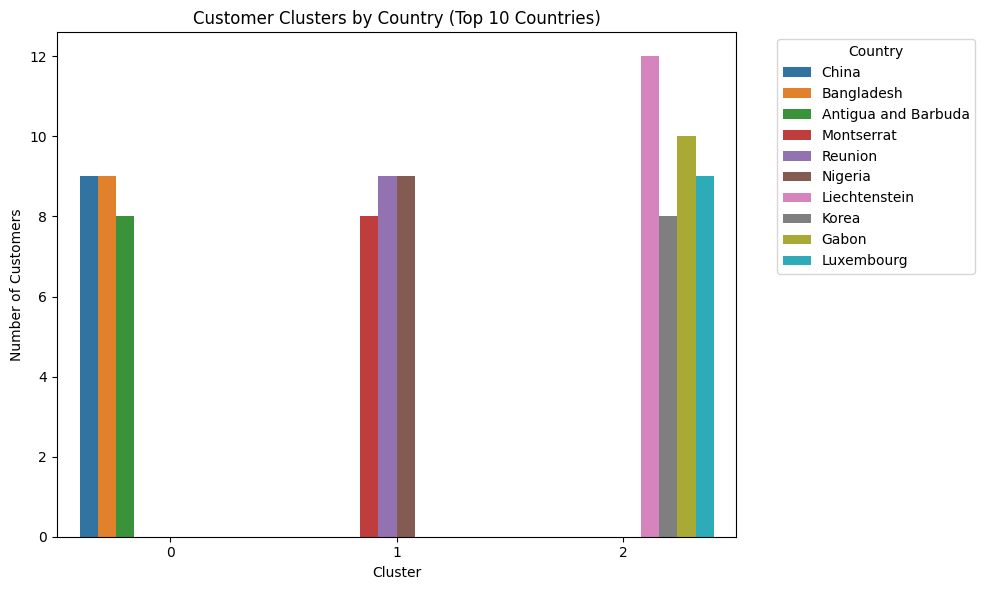

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top10, x='Cluster', hue='Country')
plt.title('Customer Clusters by Country (Top 10 Countries)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()